In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import csv


import sys
import os
import geopandas as gpd
from shapely.geometry import Polygon

In [2]:
roadQualityFileName = 'roadQuality2019.csv'
causalityFileName = "IRTAD_CASUAL_BY_AGE.csv" 
attitudesFileName = "esra.xlsx"

In [3]:
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

def plot_map(col, data, free_legend=False, lower=0.0, higher=1.0):
    #ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

    merge_df = pd.merge(left=world, right=data, how="left", left_on="name", right_on="Country")

    vmin = data[col].min()
    #print(vmin)
    vmax = data[col].max()
    #print(vmax)
    cmap = "viridis"

    fig, ax = plt.subplots(1, figsize=(20, 8))
    ax.axis('off')
    if not free_legend:
        merge_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=free_legend, vmin=lower, vmax=higher)
    else:
        merge_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap, legend=free_legend)
    world.boundary.plot(ax=ax, linewidth=0.4, edgecolor=u'gray')

    ax.set_title(col, fontdict={'fontsize': '25', 'fontweight': '3'})

    if not free_legend:
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
        # Empty array for the data range
        sm._A = []
        # Add the colorbar to the figure
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

    plt.plot()

/home/goldmanes/.local/lib/python3.11/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


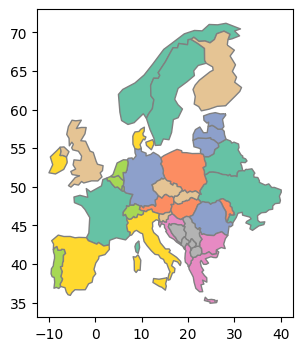

In [4]:
## Alternatively, can clip to more standard European extent 
## with Central/Eastern Russia excluded
bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.overlay(bbox_gdf, how="intersection")
world = world[world["continent"] == "Europe"][~world["name"].isin(["Russia", "Svalbard", "Iceland", "French Guiana", "Suriname"])]
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

In [5]:
# Read CSV file using Pandas
roadQualityData = pd.read_csv(roadQualityFileName)

roadQualityData

,Country,RoadQuality,Ranking
0,Netherlands,6.4,1
1,Switzerland,6.3,2
2,Austria,6.0,3
3,Portugal,6.0,4
4,Spain,5.7,5
5,Croatia,5.6,6
6,Denmark,5.6,7
7,Luxembourg,5.5,8
8,France,5.4,9
9,Finland,5.3,10


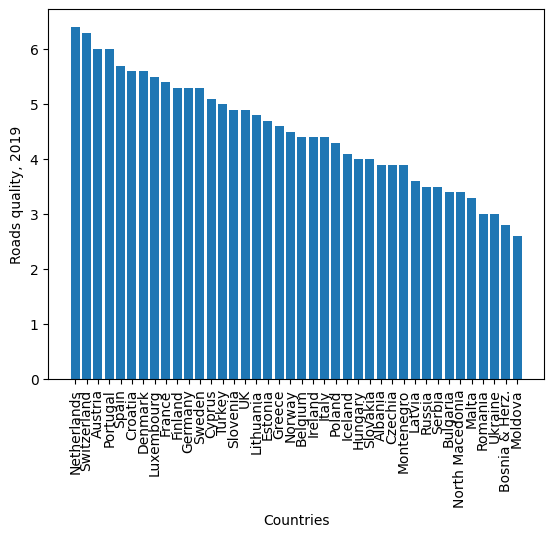

In [6]:
# Read CSV file using Pandas
roadQualityData = pd.read_csv(roadQualityFileName)

# Extract data for plotting
x = roadQualityData['Country']
y = roadQualityData['RoadQuality']



# Create bar chart using Matplotlib
plt.bar(x, y)
plt.rcParams['figure.figsize'] = [30, 15]
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)


plt.xlabel('Countries')
plt.ylabel('Roads quality, 2019')
plt.show()




In [7]:
#roadQualityData

In [8]:
Casualitydata = pd.read_csv(causalityFileName)

In [9]:
roadQualityWorldMap = pd.merge(left=world,right=roadQualityData, how="left", left_on="name", right_on="Country")
#roadQualityWorldMap

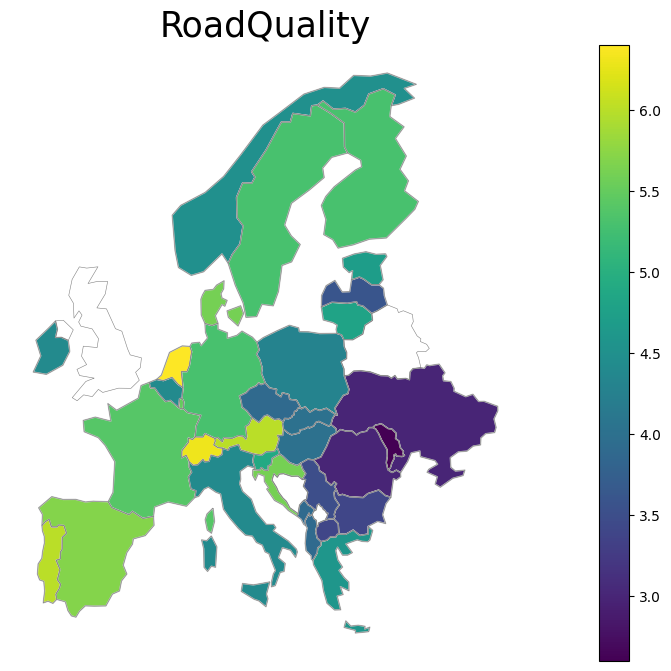

In [10]:
plot_map("RoadQuality",roadQualityData, free_legend=True)
#plot_map("pop_est",world, free_legend=True)

/tmp/ipykernel_4718/1060810076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalAccidents = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["Year"] == 2020][Casualitydata["Measure"] == "Number"][Casualitydata["AGE_GROUP"] == "TOT"]
/tmp/ipykernel_4718/1060810076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalAccidents = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["Year"] == 2020][Casualitydata["Measure"] == "Number"][Casualitydata["AGE_GROUP"] == "TOT"]
/tmp/ipykernel_4718/1060810076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalAccidents = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["Year"] == 2020][Casualitydata["Measure"] == "Number"][Casualitydata["AGE_GROUP"] == "TOT"]


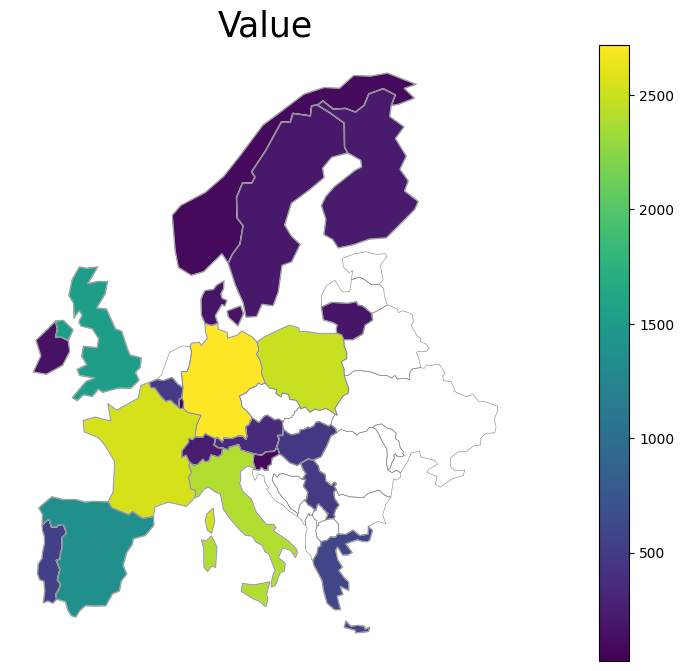

In [21]:
totalAccidents = Casualitydata[Casualitydata["TRAFFIC_PARTICIPATION"] == "TOT"][Casualitydata["Year"] == 2020][Casualitydata["Measure"] == "Number"][Casualitydata["AGE_GROUP"] == "TOT"]

#totalAccidentsWorldMap = pd.merge(left=world,right=totalAccidents, how="left", left_on="name", right_on="Country")
#totalAccidentsWorldMap

#totalAccidents
plot_map("Value",totalAccidents, free_legend=True)